In [38]:
# Import necessary libraries

import pandas as pd
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read in and preview 'tesla_2018_tweets.csv'

tesla_2018_tweets = pd.read_csv('tesla_2018_tweets.csv', engine='python')
tesla_2018_tweets.head()

,id,tweet,date_time
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14


In [3]:
# Read in and preview 'tesla_2019_tweets.csv'

tesla_2019_tweets = pd.read_csv('tesla_2019_tweets.csv', engine='python')
tesla_2019_tweets.head()

,id,tweet,date_time
0,1079975779507802113,"Time for Tesla to update the website. $3,750 o...",2019-01-01 00:41:05
1,1079985739482443778,The competition wishes. This does not happen w...,2019-01-01 01:20:40
2,1079988965418110976,A little late cuz I just got home but happy ne...,2019-01-01 01:33:29
3,1079990351824371712,Tesla: Down to the Wire @VickiBryanBondA $TSLA...,2019-01-01 01:38:59
4,1079992268545609728,"Happy Never Going Bankrupt Eve, $TSLAQ! $TSLA...",2019-01-01 01:46:36


In [4]:
# Merge tesla_2018_tweets and tesla_2019_tweets into one dataframe

tesla_tweets = pd.concat([tesla_2018_tweets, tesla_2019_tweets], ignore_index=True)

In [5]:
# Look at tesla_tweets data types

tesla_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213213 entries, 0 to 213212
Data columns (total 3 columns):
id           213213 non-null object
tweet        213213 non-null object
date_time    213153 non-null object
dtypes: object(3)
memory usage: 4.9+ MB


In [6]:
# Convert date_time column into datetime stamp

tesla_tweets.date_time = pd.to_datetime(tesla_tweets.date_time)
tesla_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213213 entries, 0 to 213212
Data columns (total 3 columns):
id           213213 non-null object
tweet        213213 non-null object
date_time    213153 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.9+ MB


## Compute Sentiment Score for Each Tweet

### Calculate Sentiment Score with Vader

In [7]:
# Use sia.polarity_scores to get sentiment for each tweets

tesla_tweets['sentiment_1'] = tesla_tweets.apply(lambda row: sia.polarity_scores(row.tweet)['compound'], axis=1)
tesla_tweets.head()

,id,tweet,date_time,sentiment_1
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19,0.2732
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15,0.2732
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37,0.0000
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37,0.0000
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14,0.2960


### Calculate Sentiment Score with TextBlob

In [8]:
# Use TextBlob to get sentiment scores

tesla_tweets['sentiment_2'] = tesla_tweets.apply(lambda row: TextBlob(row.tweet).sentiment[0], axis=1)
tesla_tweets.head()

,id,tweet,date_time,sentiment_1,sentiment_2
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19,0.2732,0.0
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15,0.2732,0.0
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37,0.0000,0.0
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37,0.0000,0.0
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14,0.2960,0.0


In [9]:
# Elon musk smoked weed in interview on 09/06/2018
# Stock drops almost 9% the next day 9/07/2018
mask = (tesla_tweets.date_time >'2018-09-05') & (tesla_tweets.date_time <= '2018-09-07')
tesla_tweets.loc[mask]

,id,tweet,date_time,sentiment_1,sentiment_2
80234,1037189465184169984,Translation: @elonmusk we need you guys to bu...,2018-09-05 00:03:33,-0.4215,-0.500000
80235,1037191343515357190,@markbspiegel @ThinkFinance999 @midwesthedgie ...,2018-09-05 00:11:01,-0.2960,0.000000
80236,1037192115359559681,New released stunning production photos of @Te...,2018-09-05 00:14:05,0.3818,0.178788
80237,1037193291874414598,Ross this is embarrassing. Tesla isn’t cool. F...,2018-09-05 00:18:45,-0.7579,0.200000
80238,1037193515523100674,Question I’m pondering. Tesla is suggesting 10...,2018-09-05 00:19:38,-0.2960,0.020833
80239,1037194716733992961,"$TSLA i think Tesla has potential, just needs ...",2018-09-05 00:24:25,0.4404,0.250000
80240,1037194951736664064,"Tesla: Don't Panic, Buy The Dip Instead #Tesla...",2018-09-05 00:25:21,0.4023,0.000000
80241,1037195003070742528,$TSLA question for everyone watching this — do...,2018-09-05 00:25:33,-0.4767,0.500000
80242,1037197237842001920,"$TSLA #Tesla Daily bars, chart has a lot of ...",2018-09-05 00:34:26,-0.2057,0.000000
80243,1037197537655103490,OBV divergence indicates $TSLA could dip below...,2018-09-05 00:35:37,-0.2960,0.250000


## EDA

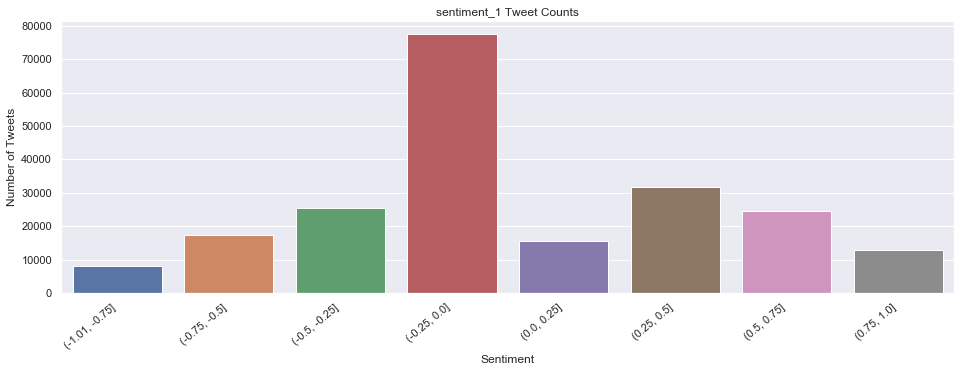

,tweet
binned_s1,
"(-1.01, -0.75]",7960
"(-0.75, -0.5]",17502
"(-0.5, -0.25]",25532
"(-0.25, 0.0]",77521
"(0.0, 0.25]",15423
"(0.25, 0.5]",31681
"(0.5, 0.75]",24597
"(0.75, 1.0]",12997


In [10]:
# View count of tweets for binned sentiment_1

bins = [-1.01, -.75, -.5, -.25, 0, .25, .5, .75, 1]
tesla_tweets['binned_s1'] = pd.cut(tesla_tweets['sentiment_1'], bins)
plt.figure(figsize=(16,5))
ax = sns.countplot(x=tesla_tweets['binned_s1'])
ax.set(ylabel = 'Number of Tweets')
ax.set(xlabel = 'Sentiment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title = "sentiment_1 Tweet Counts")
plt.show()
s1_freq = pd.DataFrame(tesla_tweets.groupby(['binned_s1'])['tweet'].count())
s1_freq

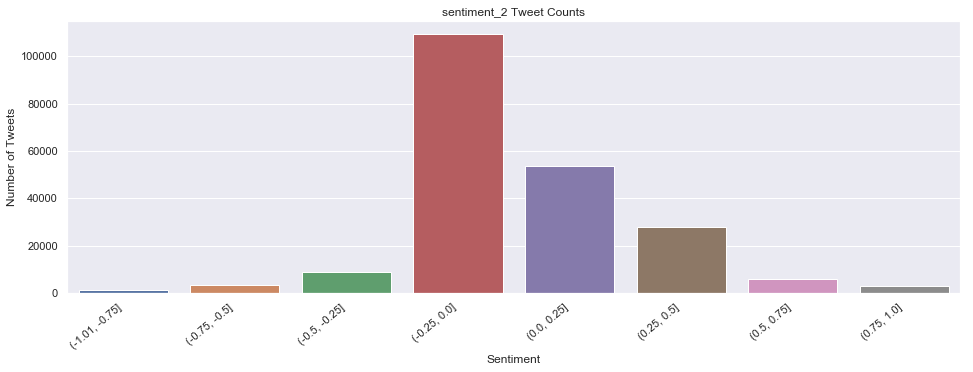

,tweet
binned_s2,
"(-1.01, -0.75]",1104
"(-0.75, -0.5]",3308
"(-0.5, -0.25]",8845
"(-0.25, 0.0]",109300
"(0.0, 0.25]",53801
"(0.25, 0.5]",28068
"(0.5, 0.75]",5954
"(0.75, 1.0]",2833


In [11]:
# View count of tweets for binned sentiment_2

bins = [-1.01, -.75, -.5, -.25, 0, .25, .5, .75, 1]
tesla_tweets['binned_s2'] = pd.cut(tesla_tweets['sentiment_2'], bins)
plt.figure(figsize=(16,5))
ax = sns.countplot(x=tesla_tweets['binned_s2'])
ax.set(ylabel = 'Number of Tweets')
ax.set(xlabel = 'Sentiment')
ax.set(title = "sentiment_2 Tweet Counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
s2_freq = pd.DataFrame(tesla_tweets.groupby(['binned_s2'])['tweet'].count())
s2_freq

In [12]:
# Tweet with the highest sentiment_1 

print(tesla_tweets.loc[tesla_tweets['sentiment_1'].idxmax()])
print(tesla_tweets.tweet.loc[tesla_tweets['sentiment_1'].idxmax()])

id                                           1075462906588872704
tweet          #NoDemand 4 #Tesla #Model3 is like saying ther...
date_time                                    2018-12-19 13:48:32
sentiment_1                                               0.9899
sentiment_2                                             0.766667
binned_s1                                            (0.75, 1.0]
binned_s2                                            (0.75, 1.0]
Name: 124546, dtype: object
#NoDemand 4 #Tesla #Model3 is like saying there's no demand 4 #TomBrady who also happens to be the BEST wide receiver, BEST offensive & defensive lineman, BEST cornerback, BEST coach, BEST manager, BEST owner, and BEST fan, all at the same time!  $TSLA #NotSellingAShareBefore2500 https://twitter.com/ValueAnalyst1/status/1075461075028623360 …


In [13]:
# Tweet with the samllest sentiment_1

print(tesla_tweets.loc[tesla_tweets['sentiment_1'].idxmin()])
print(tesla_tweets.tweet.loc[tesla_tweets['sentiment_1'].idxmin()])

id                                           1130975160658538496
tweet          So the FUD works on $TSLA but it didn’t work o...
date_time                                    2019-05-21 19:14:25
sentiment_1                                              -0.9964
sentiment_2                                                    0
binned_s1                                         (-1.01, -0.75]
binned_s2                                           (-0.25, 0.0]
Name: 190361, dtype: object
So the FUD works on $TSLA but it didn’t work on $AAPL?    FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD AND FUD


In [14]:
# Tweet with the highest sentiment_2

print(tesla_tweets.loc[tesla_tweets['sentiment_2'].idxmax()])
print(tesla_tweets.tweet.loc[tesla_tweets['sentiment_2'].idxmax()])

id                                            948943669264035840
tweet          $TSLA by using weekly this site weekly, identi...
date_time                                    2018-01-04 10:46:15
sentiment_1                                               0.7506
sentiment_2                                                    1
binned_s1                                            (0.75, 1.0]
binned_s2                                            (0.75, 1.0]
Name: 856, dtype: object
$TSLA by using weekly this site weekly, identifying perfect support  https://www.tradersfish.com/community/details/95 … #Tesla #TSLA


In [15]:
# Tweet with the samllest sentiment_2

print(tesla_tweets.loc[tesla_tweets['sentiment_2'].idxmin()])
print(tesla_tweets.tweet.loc[tesla_tweets['sentiment_2'].idxmin()])

id                                            948675122080112640
tweet          Tesla's Model 3 deliveries were awful — but th...
date_time                                    2018-01-03 16:59:09
sentiment_1                                                -0.25
sentiment_2                                                   -1
binned_s1                                          (-0.5, -0.25]
binned_s2                                         (-1.01, -0.75]
Name: 497, dtype: object
Tesla's Model 3 deliveries were awful — but the company still set a sales record for 2017 (TSLA)  http://dlvr.it/Q8mFbK  #storystream pic.twitter.com/OxscGEUYtm


### EDA with Daily Sentiment

In [16]:
daily_sentiment = tesla_tweets[['date_time','sentiment_1', 'sentiment_2']]
daily_sentiment.head()

,date_time,sentiment_1,sentiment_2
0,2018-01-01 00:33:19,0.2732,0.0
1,2018-01-01 00:35:15,0.2732,0.0
2,2018-01-01 01:02:37,0.0000,0.0
3,2018-01-01 01:15:37,0.0000,0.0
4,2018-01-01 02:32:14,0.2960,0.0


In [17]:
daily_sentiment = daily_sentiment.resample('D', on='date_time').mean()
daily_sentiment.head()

,sentiment_1,sentiment_2
date_time,,
2018-01-01,0.180875,0.165297
2018-01-02,0.140237,0.077410
2018-01-03,-0.103980,0.021639
2018-01-04,-0.047853,0.026405
2018-01-05,0.039272,0.074772


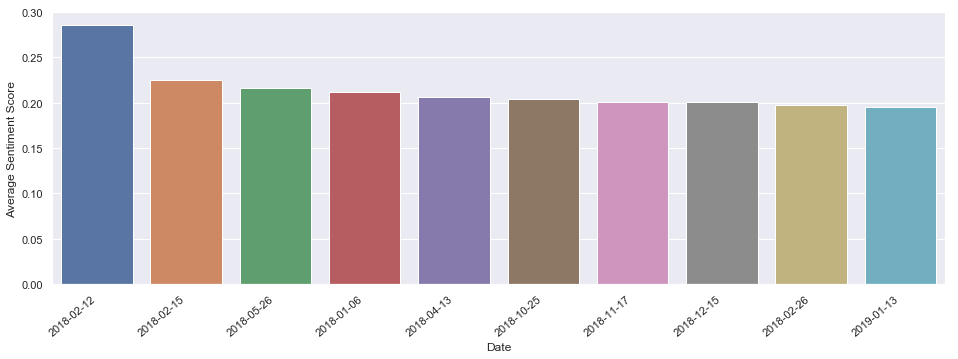

In [18]:
# Find the days with the highest sentiment_1

freq_df = daily_sentiment.nlargest(columns="sentiment_1", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_1'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

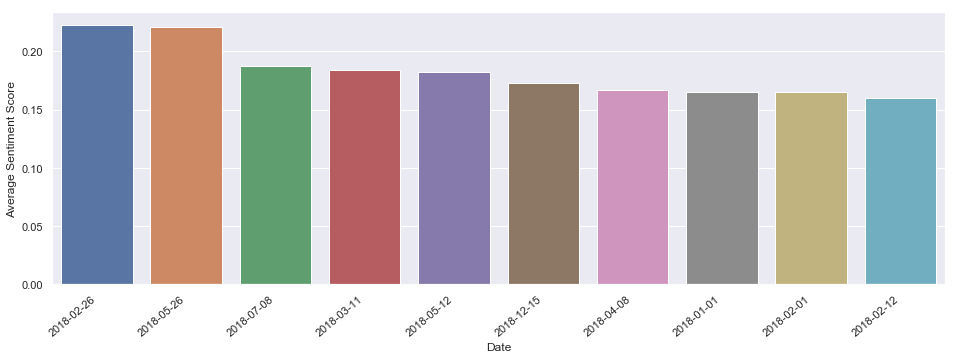

In [19]:
# Find the days with the highest sentiment_2

freq_df = daily_sentiment.nlargest(columns="sentiment_2", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_2'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

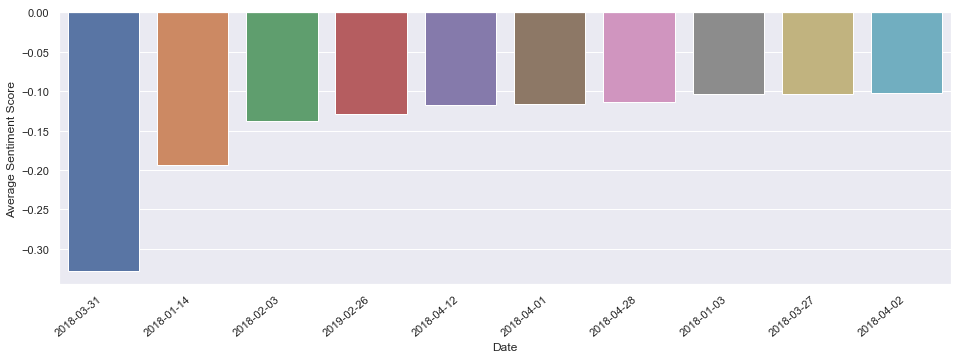

In [20]:
# Find the days with the lowest sentiment_1

freq_df = daily_sentiment.nsmallest(columns="sentiment_1", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_1'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

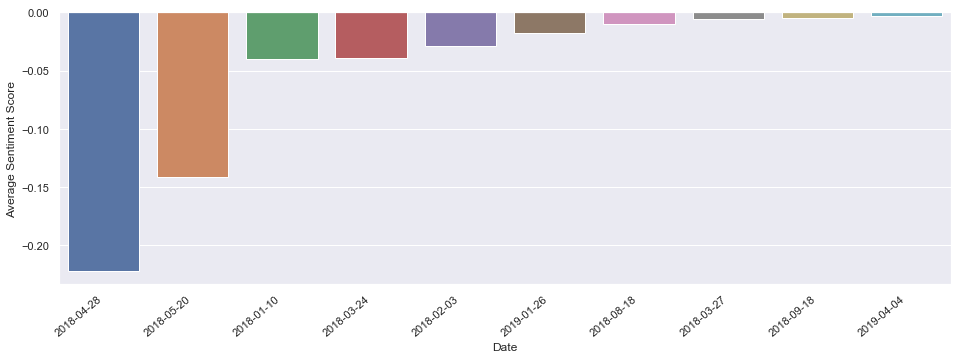

In [21]:
# Find the days with the lowest sentiment_2

freq_df = daily_sentiment.nsmallest(columns="sentiment_2", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_2'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Remove Tweets with Sentiment Scores (-0.25, 0.0] & (0.0, -0.25]

In [22]:
test = tesla_tweets.copy()
test.head()

,id,tweet,date_time,sentiment_1,sentiment_2,binned_s1,binned_s2
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19,0.2732,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15,0.2732,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37,0.0000,0.0,"(-0.25, 0.0]","(-0.25, 0.0]"
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37,0.0000,0.0,"(-0.25, 0.0]","(-0.25, 0.0]"
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14,0.2960,0.0,"(0.25, 0.5]","(-0.25, 0.0]"


In [23]:
# Remove tweets with sentiment_1 and sentiment_2 scores in (-0.25, 0.0] or (0.0, -0.25]

test = test.drop(columns = ['binned_s1', 'binned_s2'])
bins = [-1.01, -.75, -.5, -.25, 0, .25, .5, .75, 1]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
test['binned_s1'] = pd.cut(test['sentiment_1'], bins=bins, labels=labels)
test['binned_s2'] = pd.cut(test['sentiment_2'], bins=bins, labels=labels)
test = test[test.binned_s1 != 4]
test = test[test.binned_s1 != 5]
test = test[test.binned_s2 != 4]
test = test[test.binned_s2 != 5]
test.head(10)

,id,tweet,date_time,sentiment_1,sentiment_2,binned_s1,binned_s2
19,947824053401931778,#Tesla has the most robust access to #electric...,2018-01-01 08:37:18,0.4005,0.400000,6,6
20,947831140001476608,Tesla $Put $TSLA Holder Manikay Partners Has R...,2018-01-01 09:05:28,0.3400,0.600000,6,7
34,947877043881963520,"""This car’s handling is really great. I love ...",2018-01-01 12:07:52,0.9542,0.480000,8,6
35,947878666205323266,Are You Bullish Or Bearish On #Tesla? Start #T...,2018-01-01 12:14:19,0.6562,0.588281,7,7
37,947882216687853569,Theleme Partners Llp Stake in Tesla (Put) (TSL...,2018-01-01 12:28:25,0.3400,0.325000,6,6
39,947890843381268480,“Tesla seems to have done it. The car is great...,2018-01-01 13:02:42,0.6249,0.800000,7,8
41,947915077453275137,"As #Tesla (Call) (TSLA) Shares Rose, Nokota Ma...",2018-01-01 14:39:00,0.2960,0.600000,6,7
49,947931560015118336,good. very useful in Seattle 😎☔️ $TSLA #Tesla ...,2018-01-01 15:44:30,0.4672,0.363333,6,6
51,947939785749954560,Are You Bullish Or Bearish On #Tesla? Start #T...,2018-01-01 16:17:11,0.6562,0.588281,7,7
58,947955750080573440,China to suspend production of 553 passenger v...,2018-01-01 17:20:37,-0.6808,-0.500000,2,2


In [24]:
# Resample on date

test = test.resample('D', on='date_time').mean()
test.head()

,sentiment_1,sentiment_2
date_time,,
2018-01-01,0.495927,0.463653
2018-01-02,0.454316,0.417621
2018-01-03,-0.250139,0.005108
2018-01-04,0.120880,0.166267
2018-01-05,0.223903,0.317157


In [25]:
# Check that there are no null values

test.isnull().sum()

sentiment_1    0
sentiment_2    0
dtype: int64

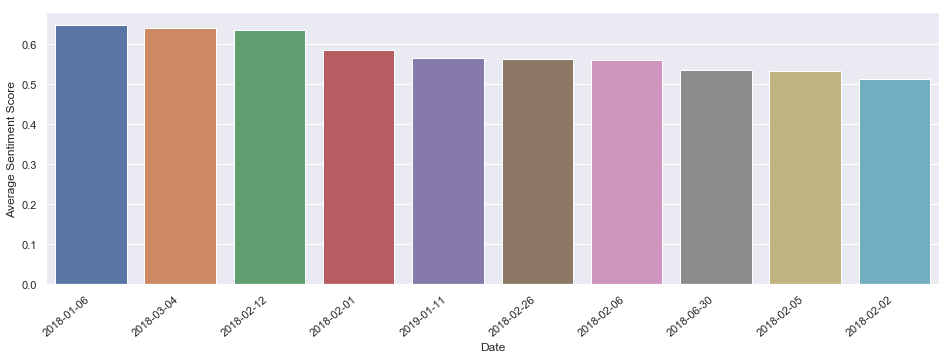

In [26]:
# Find the days with the highest sentiment_1

freq_df = test.nlargest(columns="sentiment_1", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_1'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

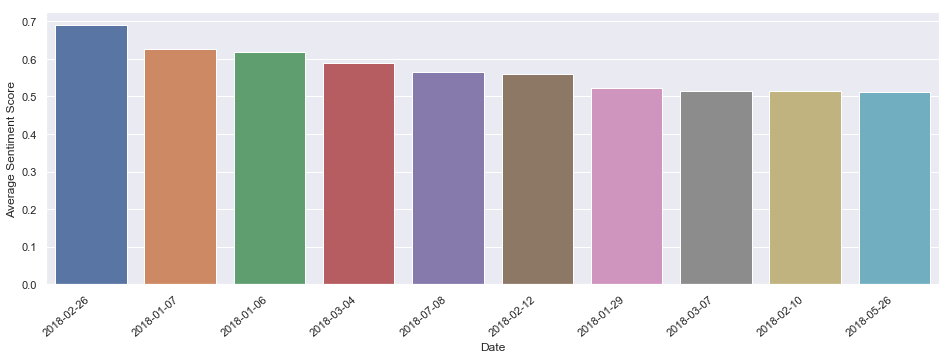

In [27]:
# Find the days with the highest sentiment_2

freq_df = test.nlargest(columns="sentiment_2", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_2'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

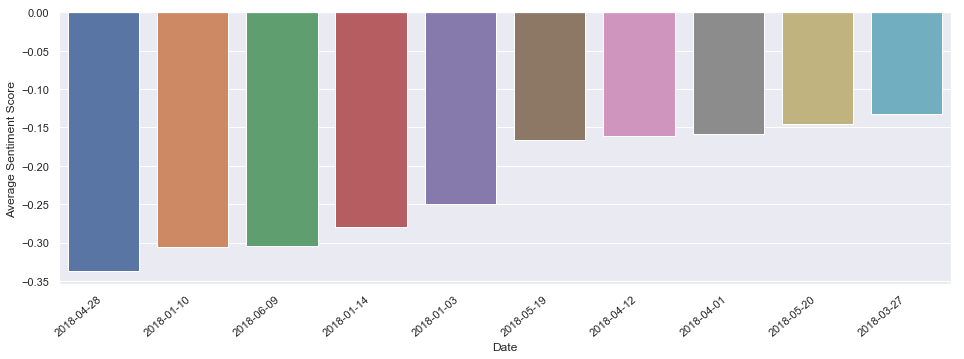

In [28]:
# Find the days with the lowest sentiment_1

freq_df = test.nsmallest(columns="sentiment_1", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_1'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

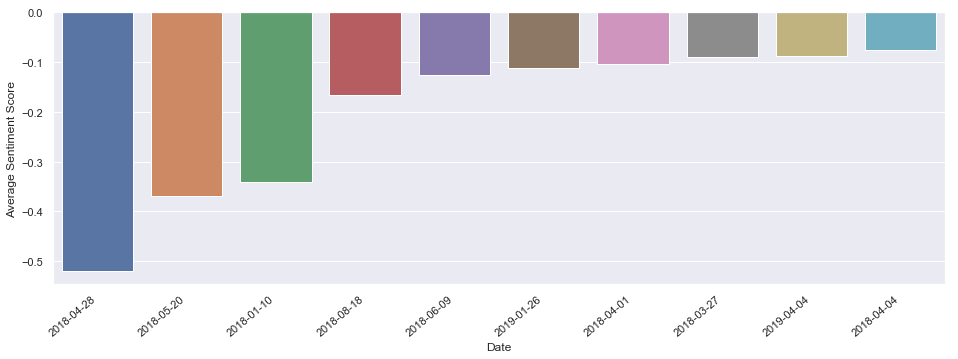

In [29]:
# Find the days with the lowest sentiment_2

freq_df = test.nsmallest(columns="sentiment_2", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_2'])
ax.set(ylabel = 'Average Sentiment Score')
ax.set(xlabel = 'Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [34]:
# Merge daily sentiment scores with removed values with daily_sentiment

test = test.rename(columns = {'sentiment_1': 's1_removed', 'sentiment_2': 's2_removed'})
daily_sentiment = pd.merge(daily_sentiment, test, how='inner', left_index=True, right_index=True)
daily_sentiment.head()

,sentiment_1,sentiment_2,s1_removed,s2_removed
date_time,,,,
2018-01-01,0.180875,0.165297,0.495927,0.463653
2018-01-02,0.140237,0.077410,0.454316,0.417621
2018-01-03,-0.103980,0.021639,-0.250139,0.005108
2018-01-04,-0.047853,0.026405,0.120880,0.166267
2018-01-05,0.039272,0.074772,0.223903,0.317157


## Scaling Sentiment Scores

In [50]:
# Scale columns 'sentiment_1' & 'sentiment_2'
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
daily_sentiment['s1_scaled'] = scaler.fit_transform(daily_sentiment[['sentiment_1']])
daily_sentiment['s2_scaled'] = scaler.fit_transform(daily_sentiment[['sentiment_2']])
daily_sentiment.head()

,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled
date_time,,,,,,
2018-01-01,0.180875,0.165297,0.495927,0.463653,0.659138,0.742611
2018-01-02,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230
2018-01-03,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328
2018-01-04,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769
2018-01-05,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358


## Save Tweets with Sentiment

In [51]:
filepath = r'/Users/erikadauria/Flatiron/Projects/Tesla_Twitter_Sentiment_Analysis/daily_sentiment_all.csv'

In [52]:
daily_sentiment.to_csv(filepath, header=True)

In [53]:
test = pd.read_csv('daily_sentiment_all.csv')
test.head()

,date_time,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled
0,2018-01-01,0.180875,0.165297,0.495927,0.463653,0.659138,0.742611
1,2018-01-02,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230
2,2018-01-03,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328
3,2018-01-04,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769
4,2018-01-05,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358
